In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib 

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()
pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None # default='warn'

elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])
#elements_df.columns

In [2]:
fplstats_df = elements_df[['first_name','second_name','now_cost','minutes','value_season','total_points','element_type', 'team']]

In [3]:
fplstats_df.loc[:,'position'] = fplstats_df.element_type.map(elements_types_df.set_index('id').singular_name)

In [4]:
fplstats_df.loc[:,'team'] = fplstats_df.team.map(teams_df.set_index('id').name)

In [5]:
fplstats_df['value'] = fplstats_df.value_season.astype(float)

In [6]:
fpl_stats = fplstats_df.drop('element_type', 1)
fpl_stats = fpl_stats.drop('value_season', 1)
#fpl_stats.head()

C:\Users\B0SS\AppData\Local\Temp/ipykernel_17260/1407549714.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  fpl_stats = fplstats_df.drop('element_type', 1)
C:\Users\B0SS\AppData\Local\Temp/ipykernel_17260/1407549714.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  fpl_stats = fpl_stats.drop('value_season', 1)


In [7]:
testdf = fpl_stats[fpl_stats.columns[[5,0,1,6,2,3,4,7]]]
testdf = testdf.rename({'team': 'Team', 'first_name': 'FirstName','second_name': 'SecondName', 'position': 'Position','now_cost': 'Cost', 'minutes': 'MinsPlayed','total_points': 'TotalPoints', 'value': 'Value'}, axis='columns')
#testdf.head(20)

In [8]:
fpl_stats = testdf
#fpl_stats.head(50)

In [9]:
fpl_stats = fpl_stats.loc[fpl_stats.Value > 0]

In [10]:
FWstats = fpl_stats.loc[fpl_stats.Position == 'Forward']
MFstats = fpl_stats.loc[fpl_stats.Position == 'Midfielder']
DFstats = fpl_stats.loc[fpl_stats.Position == 'Defender']
GKstats = fpl_stats.loc[fpl_stats.Position == 'Goalkeeper']

,Team,FirstName,SecondName,Position,Cost,MinsPlayed,TotalPoints,Value
263,Leicester,Jamie,Vardy,Forward,108,755,57,5.3
567,West Ham,Michail,Antonio,Forward,82,718,57,7.0
363,Man City,Gabriel Fernando,de Jesus,Forward,86,585,46,5.3
421,Newcastle,Allan,Saint-Maximin,Forward,68,800,41,6.0
61,Aston Villa,Danny,Ings,Forward,78,759,39,5.0
549,Watford,Emmanuel,Dennis,Forward,52,665,38,7.3
3,Arsenal,Pierre-Emerick,Aubameyang,Forward,100,608,37,3.7
552,Watford,Joshua,King,Forward,56,456,36,6.4
71,Brentford,Ivan,Toney,Forward,66,810,35,5.3
110,Brighton,Neal,Maupay,Forward,65,732,35,5.4


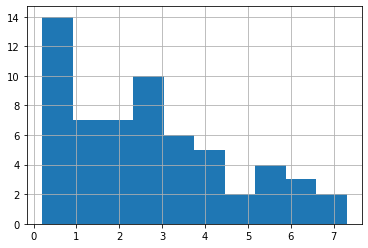

In [11]:
FWstats.Value.hist()
FWstats.sort_values('TotalPoints',ascending=False).head(10)


,Team,FirstName,SecondName,Position,Cost,MinsPlayed,TotalPoints,Value
330,Liverpool,Mohamed,Salah,Midfielder,129,810,107,8.3
495,Spurs,Heung-Min,Son,Midfielder,102,698,53,5.2
573,West Ham,Saïd,Benrahma,Midfielder,65,763,50,7.7
327,Liverpool,Sadio,Mané,Midfielder,119,733,50,4.2
243,Everton,Andros,Townsend,Midfielder,57,699,47,8.2
268,Leicester,Youri,Tielemans,Midfielder,65,810,47,7.2
169,Chelsea,Mateo,Kovacic,Midfielder,53,702,46,8.7
233,Everton,Abdoulaye,Doucouré,Midfielder,56,720,45,8.0
395,Man Utd,Mason,Greenwood,Midfielder,76,729,44,5.8
385,Man Utd,Bruno Miguel,Borges Fernandes,Midfielder,117,775,44,3.8


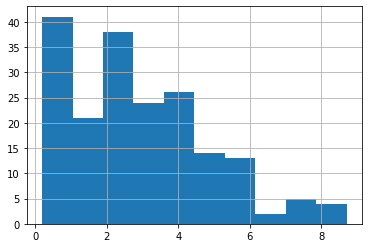

In [12]:
MFstats.Value.hist()
MFstats.sort_values('TotalPoints',ascending=False).head(10)

,Team,FirstName,SecondName,Position,Cost,MinsPlayed,TotalPoints,Value
356,Man City,João Pedro Cavaco,Cancelo,Defender,64,810,51,8.0
334,Liverpool,Trent,Alexander-Arnold,Defender,76,603,51,6.7
326,Liverpool,Virgil,van Dijk,Defender,66,810,47,7.1
565,West Ham,Aaron,Cresswell,Defender,55,810,45,8.2
171,Chelsea,Antonio,Rüdiger,Defender,58,720,45,7.8
188,Chelsea,Trevoh,Chalobah,Defender,49,453,44,9.0
362,Man City,Rúben Santos,Gato Alves Dias,Defender,62,738,42,6.8
163,Chelsea,César,Azpilicueta,Defender,62,630,42,6.8
69,Brentford,Pontus,Jansson,Defender,47,801,41,8.7
84,Brentford,Ethan,Pinnock,Defender,47,717,41,8.7


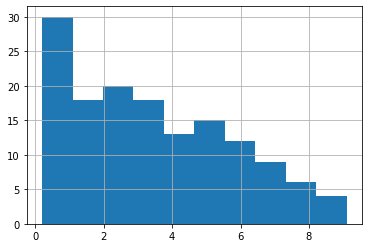

In [13]:
DFstats.Value.hist()
DFstats.sort_values('TotalPoints',ascending=False).head(10)

,Team,FirstName,SecondName,Position,Cost,MinsPlayed,TotalPoints,Value
186,Chelsea,Edouard,Mendy,Goalkeeper,62,720,45,7.3
328,Liverpool,Alisson,Ramses Becker,Goalkeeper,60,720,42,7.0
38,Aston Villa,Emiliano,Martínez,Goalkeeper,55,720,41,7.5
490,Spurs,Hugo,Lloris,Goalkeeper,55,810,39,7.1
357,Man City,Ederson,Santana de Moraes,Goalkeeper,60,720,37,6.2
611,Wolves,José,Malheiro de Sá,Goalkeeper,50,810,35,7.0
115,Brighton,Robert,Sánchez,Goalkeeper,46,810,35,7.6
73,Brentford,David,Raya Martin,Goalkeeper,46,810,34,7.4
562,West Ham,Lukasz,Fabianski,Goalkeeper,50,810,33,6.6
378,Man Utd,David,de Gea,Goalkeeper,50,810,31,6.2


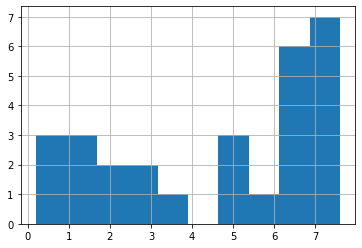

In [14]:
GKstats.Value.hist()
GKstats.sort_values('TotalPoints',ascending=False).head(10)

In [15]:
testppmp = fpl_stats
testppmp['PPMP'] = testppmp['TotalPoints'] / testppmp['MinsPlayed']
testppmp = testppmp.loc[testppmp.MinsPlayed > (testppmp['MinsPlayed'].mean())]
testppmp.sort_values('PPMP',ascending=False).head(20)

,Team,FirstName,SecondName,Position,Cost,MinsPlayed,TotalPoints,Value,PPMP
330,Liverpool,Mohamed,Salah,Midfielder,129,810,107,8.3,0.132099
188,Chelsea,Trevoh,Chalobah,Defender,49,453,44,9.0,0.097130
181,Chelsea,Mason,Mount,Midfielder,75,446,41,5.5,0.091928
334,Liverpool,Trent,Alexander-Arnold,Defender,76,603,51,6.7,0.084577
616,Wolves,Hee-Chan,Hwang,Forward,57,426,34,6.0,0.079812
567,West Ham,Michail,Antonio,Forward,82,718,57,7.0,0.079387
552,Watford,Joshua,King,Forward,56,456,36,6.4,0.078947
363,Man City,Gabriel Fernando,de Jesus,Forward,86,585,46,5.3,0.078632
495,Spurs,Heung-Min,Son,Midfielder,102,698,53,5.2,0.075931
263,Leicester,Jamie,Vardy,Forward,108,755,57,5.3,0.075497
